In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Check out the source data.

In [2]:
districts = gpd.read_file('Community_Districts_cityofnewyork.us.geojson')

In [3]:
districts.head()

,boro_cd,shape_area,shape_leng,geometry
0,311,103177785.365,51549.5578567,"MULTIPOLYGON (((-73.97299 40.60881, -73.97259 ..."
1,313,88195686.2748,65821.875577,"MULTIPOLYGON (((-73.98372 40.59582, -73.98305 ..."
2,312,99525500.0655,52245.8304843,"MULTIPOLYGON (((-73.97140 40.64826, -73.97121 ..."
3,304,56663217.0191,37008.1004432,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
4,206,42664311.28,35875.7111716,"MULTIPOLYGON (((-73.87185 40.84376, -73.87192 ..."


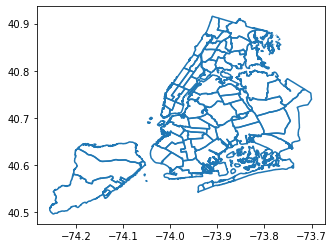

In [4]:
districts.boundary.plot()

In [5]:
trips = pd.read_csv('202001-citibike-tripdata.csv.zip')

In [6]:
print(trips.shape)
print(trips.dtypes)
trips.head()

(1240596, 15)
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


In [7]:
trips.columns = trips.columns.str.replace(' ', '_')
trips.rename({'starttime': 'start_time', 'stoptime': 'stop_time'}, axis='columns', inplace=True)
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['stop_time'] = pd.to_datetime(trips['stop_time'])
trips['start_hour'] = trips['start_time'].dt.hour
trips['stop_hour'] = trips['stop_time'].dt.hour
trips['start_dow'] = trips['start_time'].dt.weekday + 1
trips['stop_dow'] = trips['stop_time'].dt.weekday + 1
trips.head()      

,tripduration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_hour,stop_hour,start_dow,stop_dow
0,789,2020-01-01 00:00:55.390,2020-01-01 00:14:05.147,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1,0,0,3,3
1,1541,2020-01-01 00:01:08.102,2020-01-01 00:26:49.178,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1,0,0,3,3
2,1464,2020-01-01 00:01:42.140,2020-01-01 00:26:07.011,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1,0,0,3,3
3,592,2020-01-01 00:01:45.561,2020-01-01 00:11:38.155,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1,0,0,3,3
4,702,2020-01-01 00:01:45.788,2020-01-01 00:13:28.240,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1,0,0,3,3


## 2 - Clean some outliers

count    1240596.00
mean         784.63
std         6076.15
min           61.00
1%            98.00
5%           159.00
10%          207.00
25%          323.00
50%          529.00
75%          894.00
90%         1447.00
95%         1843.00
99%         2749.00
max      1952746.00
Name: tripduration, dtype: float64

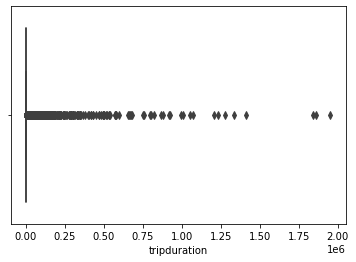

In [8]:
sns.boxplot(trips['tripduration'])
round(trips['tripduration'].describe(percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]), 2)

A trip for several days may be the result of an error (or a stolen bike).
A ride within one minute also cannot be considered as valid.

In [9]:
trips = trips[trips['tripduration'] >= trips['tripduration'].quantile(0.01)]
trips = trips[trips['tripduration'] <= trips['tripduration'].quantile(0.99)]

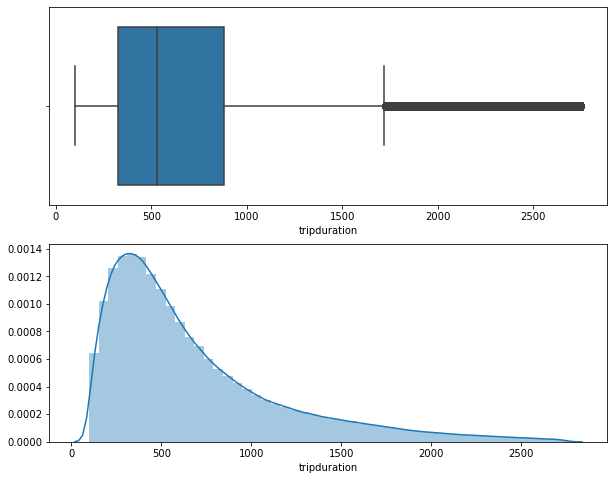

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8)
                              )
sns.boxplot(trips['tripduration'], ax=ax1)
sns.distplot(trips['tripduration'], ax=ax2)

...now distribution looks a little better.

## 3 - Lets try to find some patterns in the data

Trips time distribution by time of day and by days of a week

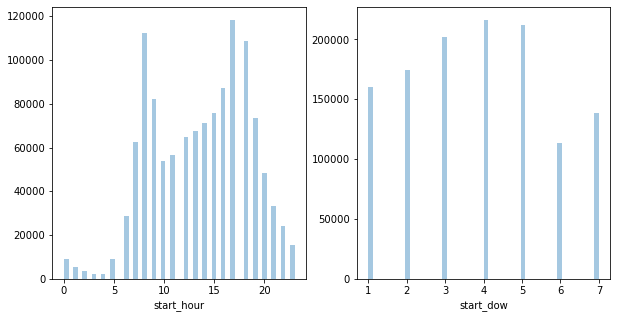

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(trips['start_hour'], kde=False, ax=ax1)
sns.distplot(trips['start_dow'], kde=False, ax=ax2)

Trips time distribution by time of day on weekdays and weekends

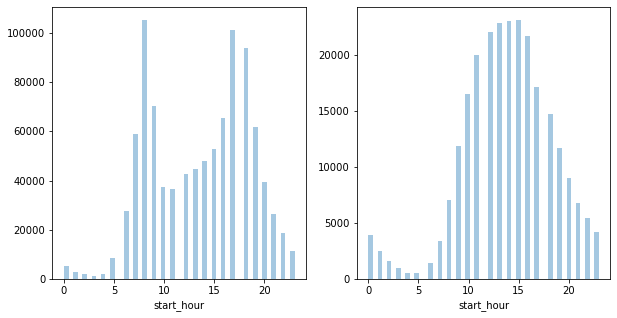

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(trips[trips['start_dow']<=5]['start_hour'], kde=False, ax=ax1)
sns.distplot(trips[trips['start_dow']>=6]['start_hour'], kde=False, ax=ax2)

## 4 - Data Visualisation

In [13]:
stations = pd.DataFrame(np.concatenate(
    (trips[['start_station_name', 'start_station_latitude', 'start_station_longitude']].values,
    trips[['end_station_name', 'end_station_latitude', 'end_station_longitude']].values), 
    axis=0)).drop_duplicates()
stations.columns = 'station_name', 'station_latitude', 'station_longitude'
stations.reset_index(drop=True, inplace=True)
display(stations)

,station_name,station_latitude,station_longitude
0,1 Ave & E 16 St,40.7322,-73.9817
1,West Drive & Prospect Park West,40.6611,-73.9795
2,E 33 St & 1 Ave,40.7432,-73.9745
3,Bank St & Hudson St,40.7365,-74.0062
4,Franklin Ave & Myrtle Ave,40.6945,-73.958
...,...,...,...
950,NYCBS DEPOT - DELANCEY,40.7164,-73.9823
951,W 52 St & 5 Ave,40.761,-73.977
952,E 17 St & Broadway,40.737,-73.989
953,Forrest portable kiosk,40.703,-73.932


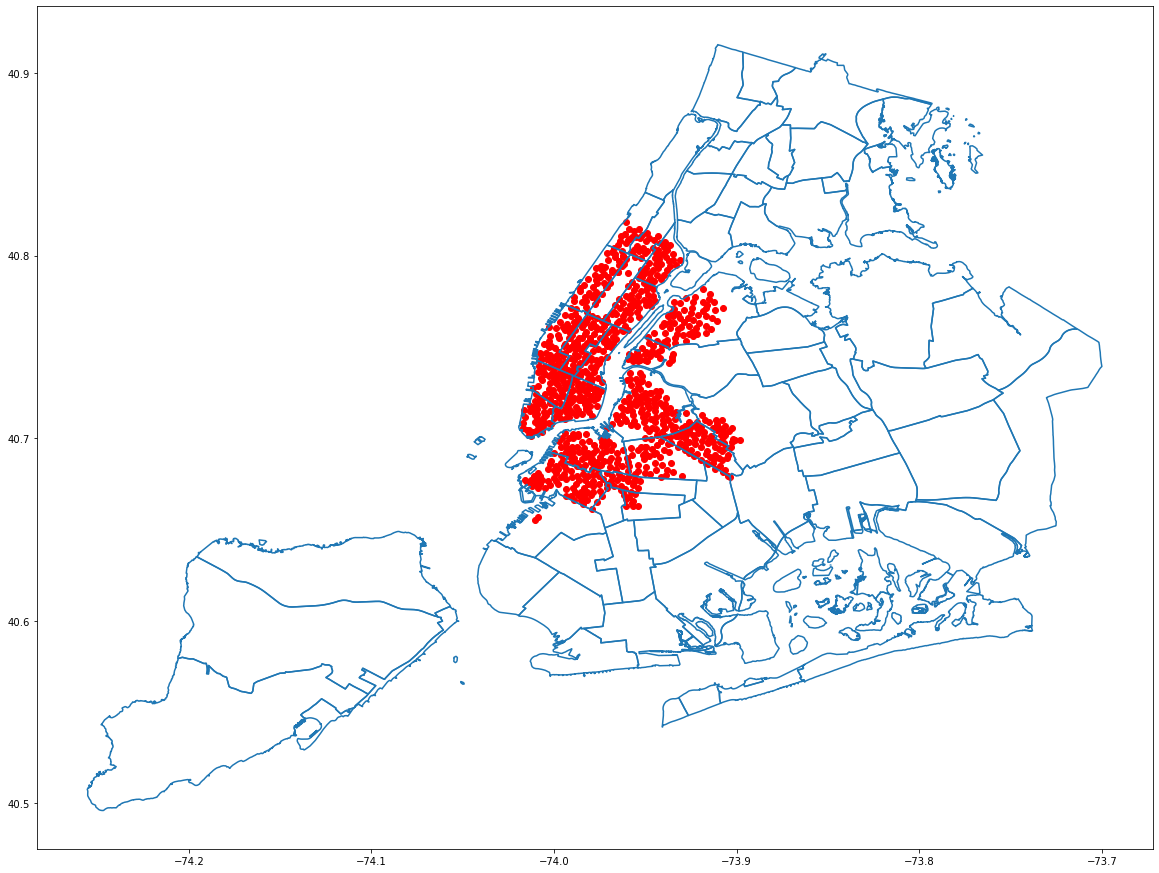

In [14]:
stations_gdf = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations['station_longitude'], stations['station_latitude']))

ax_map = districts.boundary.plot(figsize=(20, 20))
stations_gdf.plot(ax=ax_map, color='red')

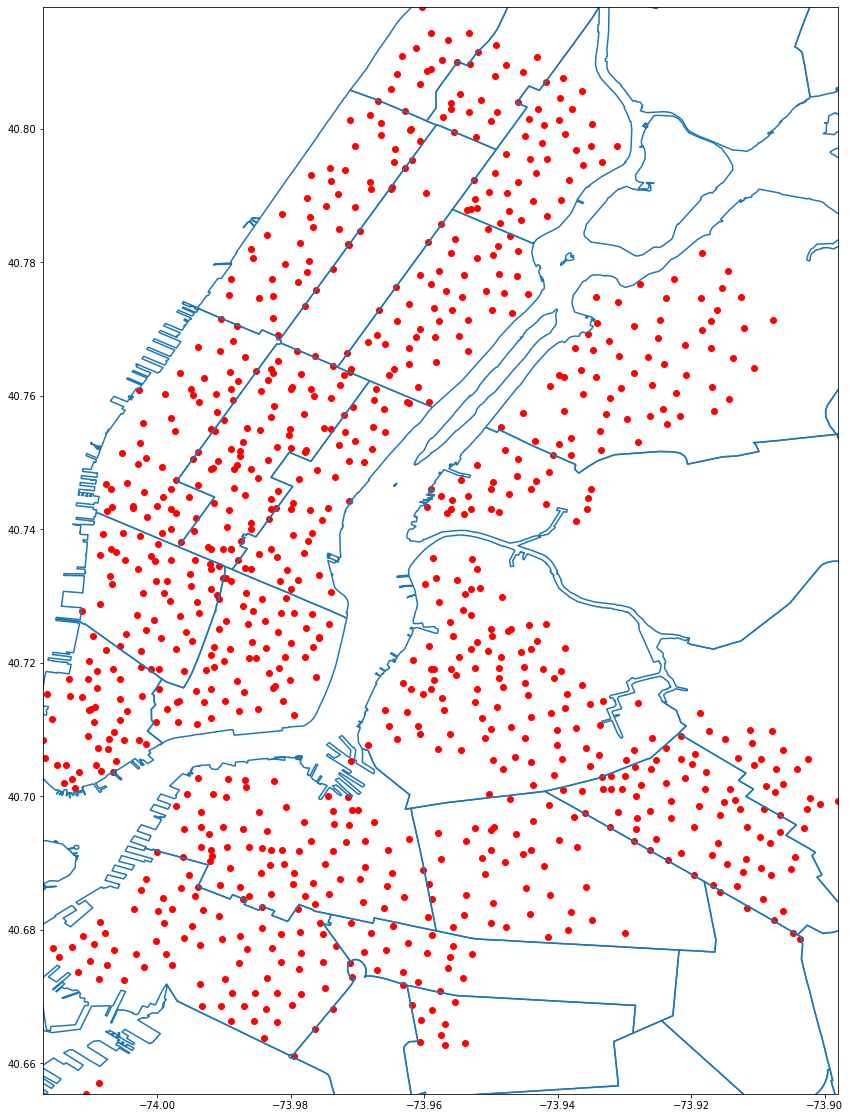

In [15]:
minx, miny, maxx, maxy = stations_gdf.total_bounds
ax_map = districts.boundary.plot(figsize=(20, 20))
ax_map.set_xlim(minx, maxx)
ax_map.set_ylim(miny, maxy)
stations_gdf.plot(ax=ax_map, color='red')